In [21]:
import csv
import numpy as np
import pandas as pd
import mpl_toolkits.mplot3d
from sklearn import datasets
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.impute import SimpleImputer

In [22]:
filename = 'metadata.csv'
with open(filename, 'r') as csvfile:
    datareader = csv.reader(csvfile)
    for row in datareader:
        headers = row
        break

In [23]:
chosen_headers = ["sample", "condition", "dissection", "libprep","gender","animalreturn","seqFacility", "strain" ]
sample_index = headers.index(chosen_headers[0])
condition_index = headers.index(chosen_headers[1])
dissection_index = headers.index(chosen_headers[2])
libprep_index = headers.index(chosen_headers[3])
gender_index = headers.index(chosen_headers[4])
animalreturn_index = headers.index(chosen_headers[5])
seqFacility_index = headers.index(chosen_headers[6])
strain_index = headers.index(chosen_headers[7])

In [24]:
filename = 'metadata.csv'
parameters = []
conditionDict = dict()
dissectionDict = dict()
libprepDict = dict()
genderDict = dict()
animalreturnDict = dict()
seqFacilityDict = dict()
strainDict = dict()
with open(filename, 'r') as csvfile:
    datareader = csv.reader(csvfile)
    for row in datareader:
      sample = row[sample_index]
      condition = row[condition_index]
      dissection = row[dissection_index]
      libprep = row[libprep_index]
      gender = row[gender_index]
      animalreturn = row[animalreturn_index]
      seqFacility = row[seqFacility_index]
      strain = row[strain_index]
      conditionDict[sample] = condition
      dissectionDict[sample] = dissection
      libprepDict[sample] = libprep
      genderDict[sample] = gender
      animalreturnDict[sample] = animalreturn
      seqFacilityDict[sample] = seqFacility
      strainDict[sample]= strain
      values = [sample, condition, dissection, libprep,gender, animalreturn, seqFacility, strain]
      parameters.append(values)
parameters = np.array(parameters)

In [25]:
metaData = pd.read_csv('metadata.csv')
data = pd.read_csv('data.csv')

In [26]:
with open("data.csv") as csv_file:
  for s in csv.reader(csv_file, delimiter=','):
    samples = s
    break
samples.remove(samples[0])

In [27]:
X = []
y = []
for sample in samples:
  column = data[sample].tolist()
  X.append(column)
  if sample in genderDict:
    if genderDict[sample] == "male":
      y.append(0)
    else:
      y.append(1)
X = np.array(X)

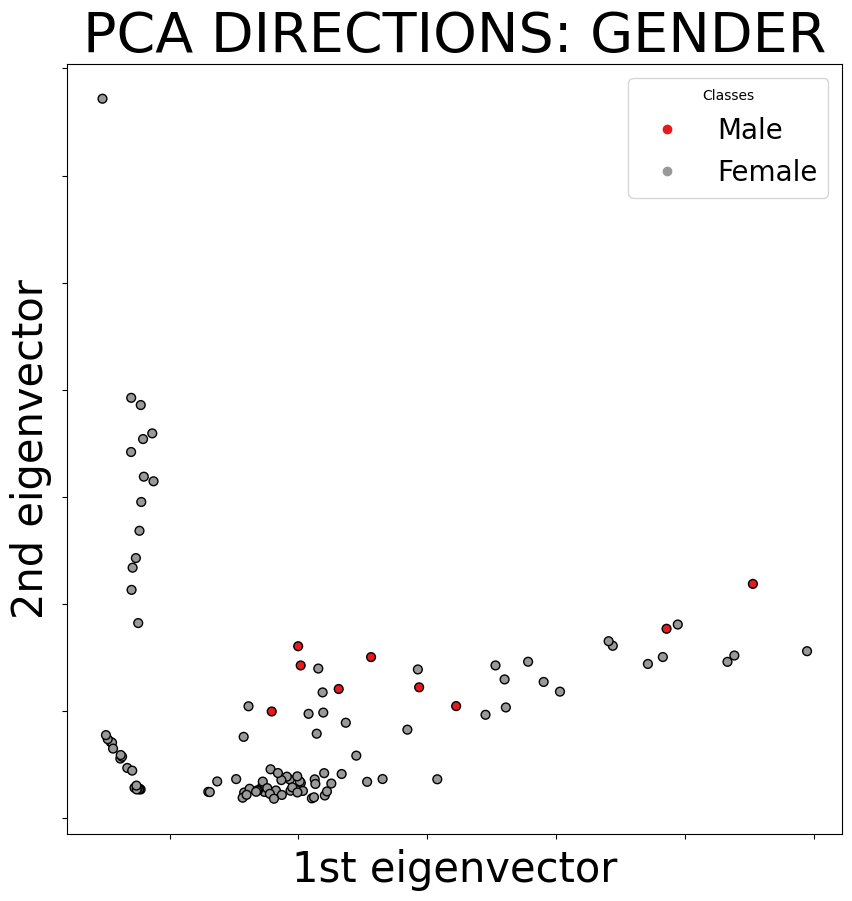

In [28]:
imputer = SimpleImputer()
X = imputer.fit_transform(X)
Z = PCA(n_components=2).fit_transform(X)

fig, ax = plt.subplots(figsize=(10,10))
scatter = ax.scatter(Z[:, 0], Z[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k", s=40)

ax.set_title("PCA DIRECTIONS: GENDER", size=40)
ax.set_xlabel("1st eigenvector", size=30)
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector", size=30)
ax.yaxis.set_ticklabels([])

plt.legend(handles=scatter.legend_elements()[0], title="Classes", labels= ['Male', 'Female'], fontsize=20)
plt.show()

In [29]:
y = []
for sample in samples:
  if sample in animalreturnDict:
    if animalreturnDict[sample] == "LAR":
      y.append(0)
    else:
      y.append(1)

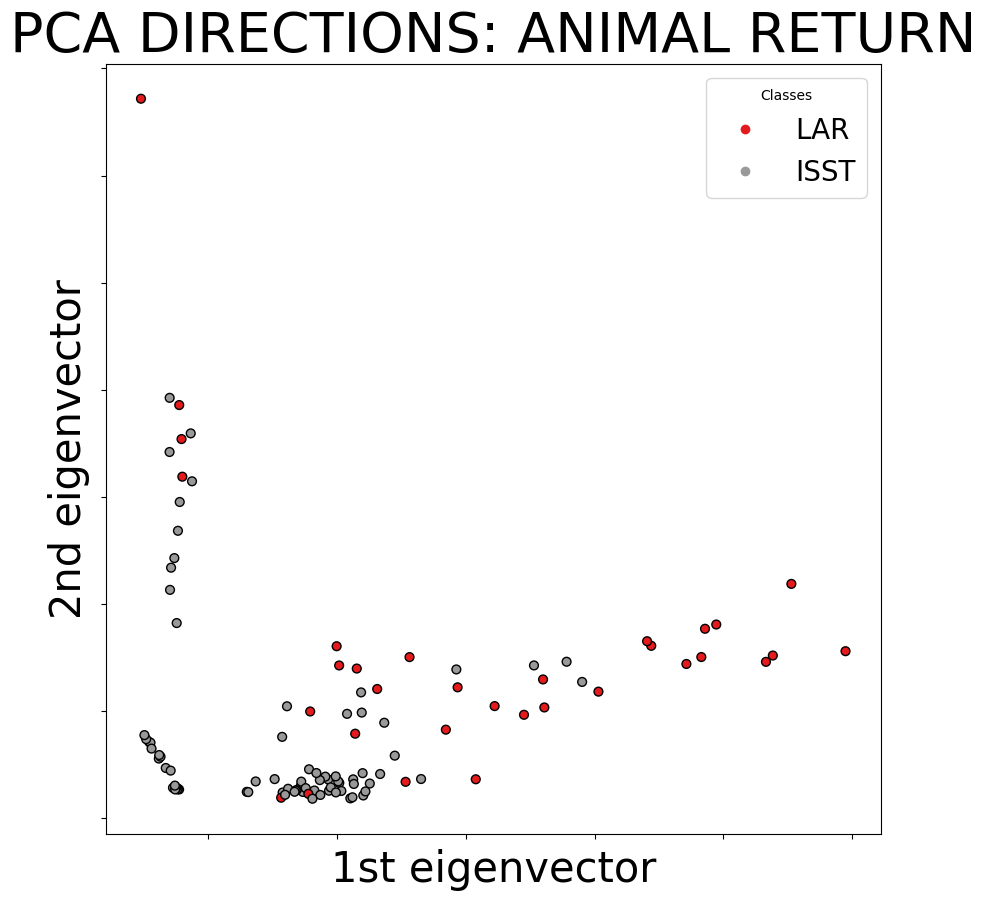

In [30]:
Z = PCA(n_components=2).fit_transform(X)

fig, ax = plt.subplots(figsize=(10,10))
scatter = ax.scatter(Z[:, 0], Z[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k", s=40)

ax.set_title("PCA DIRECTIONS: ANIMAL RETURN", size=40)
ax.set_xlabel("1st eigenvector", size=30)
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector", size=30)
ax.yaxis.set_ticklabels([])

plt.legend(handles=scatter.legend_elements()[0], title="Classes", labels= ['LAR', 'ISST'], fontsize=20)
plt.show()

In [31]:
X = []
y = []
for sample in samples:
  column = data[sample].tolist()
  X.append(column)
  if sample in conditionDict:
    if conditionDict[sample] == "FLT":
      y.append(0)
    else:
      y.append(1)
print(y)
X = np.array(X)

[0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0]


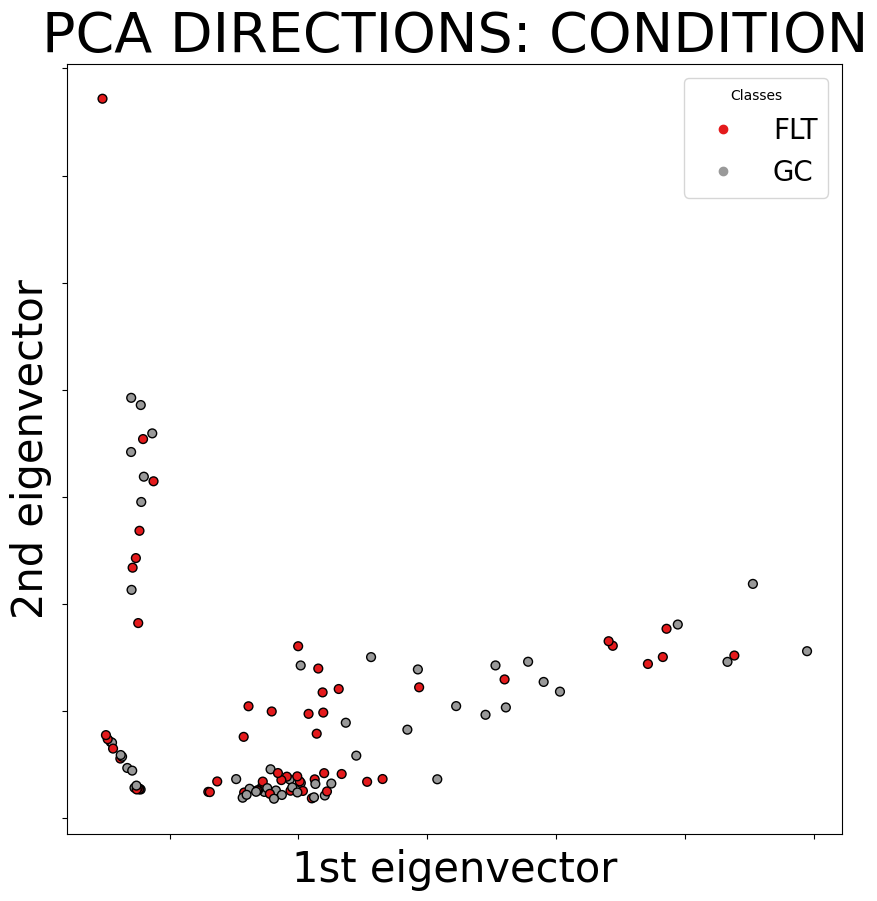

In [32]:
Z = PCA(n_components=2).fit_transform(X)

fig, ax = plt.subplots(figsize=(10,10))
scatter = ax.scatter(Z[:, 0], Z[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k", s=40)

ax.set_title("PCA DIRECTIONS: CONDITION", size=40)
ax.set_xlabel("1st eigenvector", size=30)
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector", size=30)
ax.yaxis.set_ticklabels([])

plt.legend(handles=scatter.legend_elements()[0], title="Classes", labels= ['FLT', 'GC'], fontsize=20)
plt.show()

In [33]:
y = []
for sample in samples:
  if sample in dissectionDict:
    if dissectionDict[sample] == "immediate":
      y.append(0)
    else:
      y.append(1)

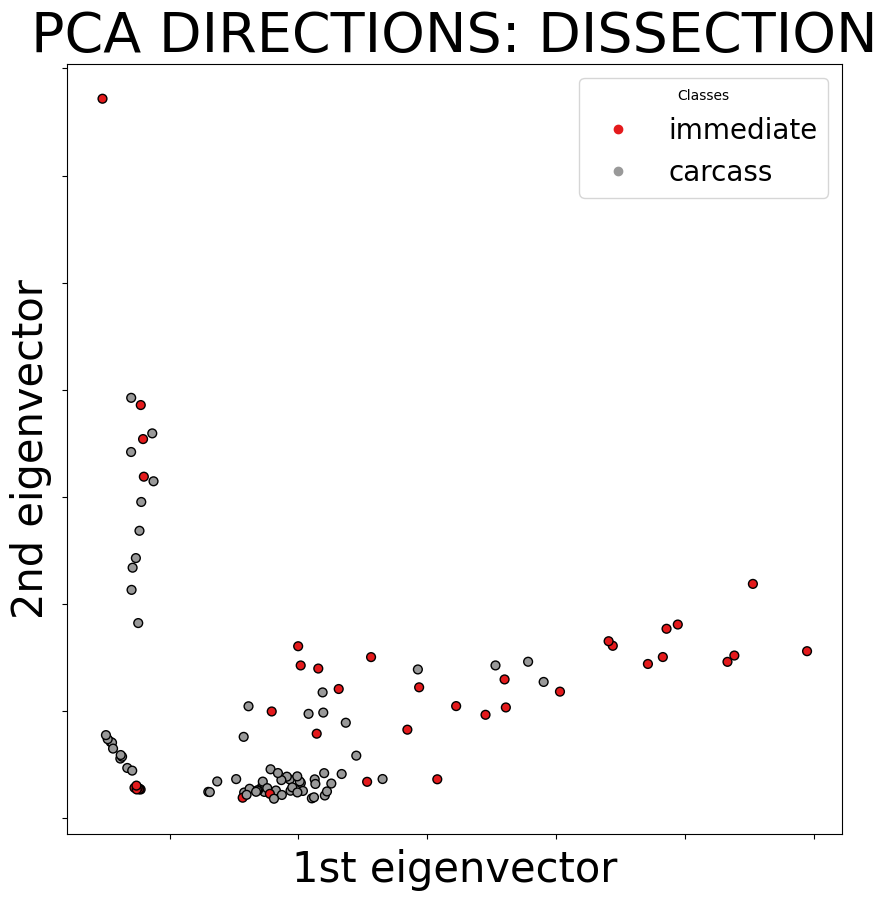

In [34]:
Z = PCA(n_components=2).fit_transform(X)

fig, ax = plt.subplots(figsize=(10,10))
scatter = ax.scatter(Z[:, 0], Z[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k", s=40)

ax.set_title("PCA DIRECTIONS: DISSECTION", size=40)
ax.set_xlabel("1st eigenvector", size=30)
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector", size=30)
ax.yaxis.set_ticklabels([])

plt.legend(handles=scatter.legend_elements()[0], title="Classes", labels= ['immediate', 'carcass'], fontsize=20)
plt.show()

In [35]:
y = []
for sample in samples:
  if sample in libprepDict:
    if libprepDict[sample] == "ribodepleted":
      y.append(0)
    else:
      y.append(1)

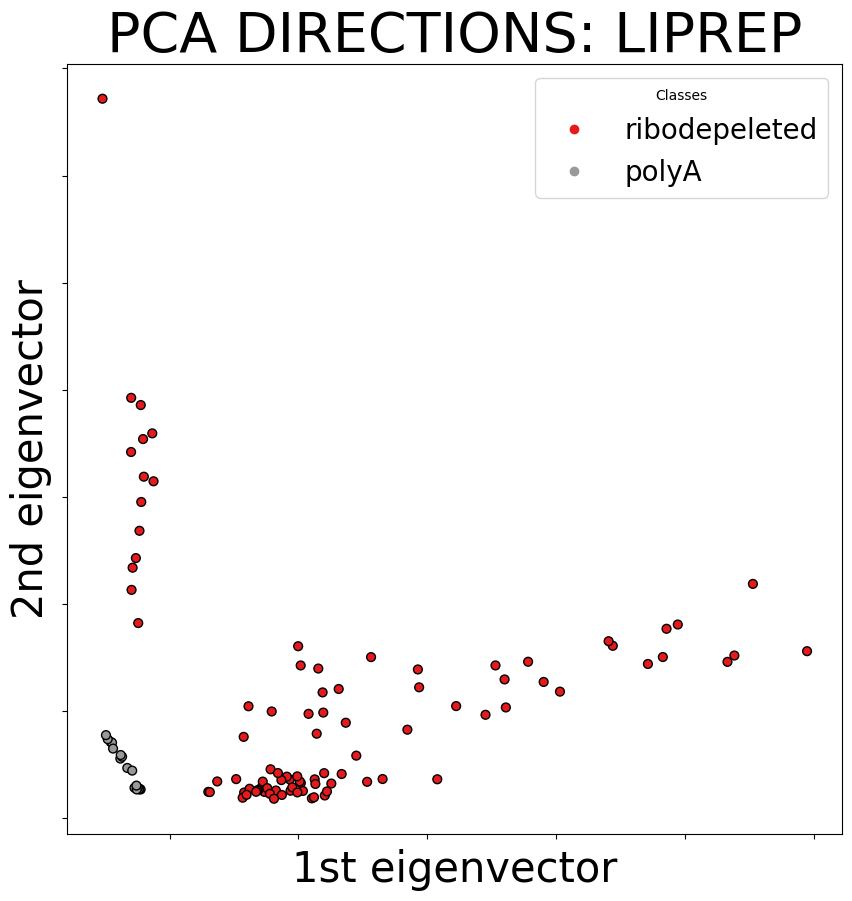

In [36]:
Z = PCA(n_components=2).fit_transform(X)

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(Z[:, 0], Z[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k", s=40)

ax.set_title("PCA DIRECTIONS: LIPREP", size=40)
ax.set_xlabel("1st eigenvector", size=30)
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector", size=30)
ax.yaxis.set_ticklabels([])

plt.legend(handles=scatter.legend_elements()[0], title="Classes", labels= ['ribodepeleted', 'polyA'], fontsize=20)
plt.show()

In [37]:
y = []
for sample in samples:
  if sample in seqFacilityDict:
    if seqFacilityDict[sample] == "UCDavis":
      y.append(0)
    else:
      y.append(1)

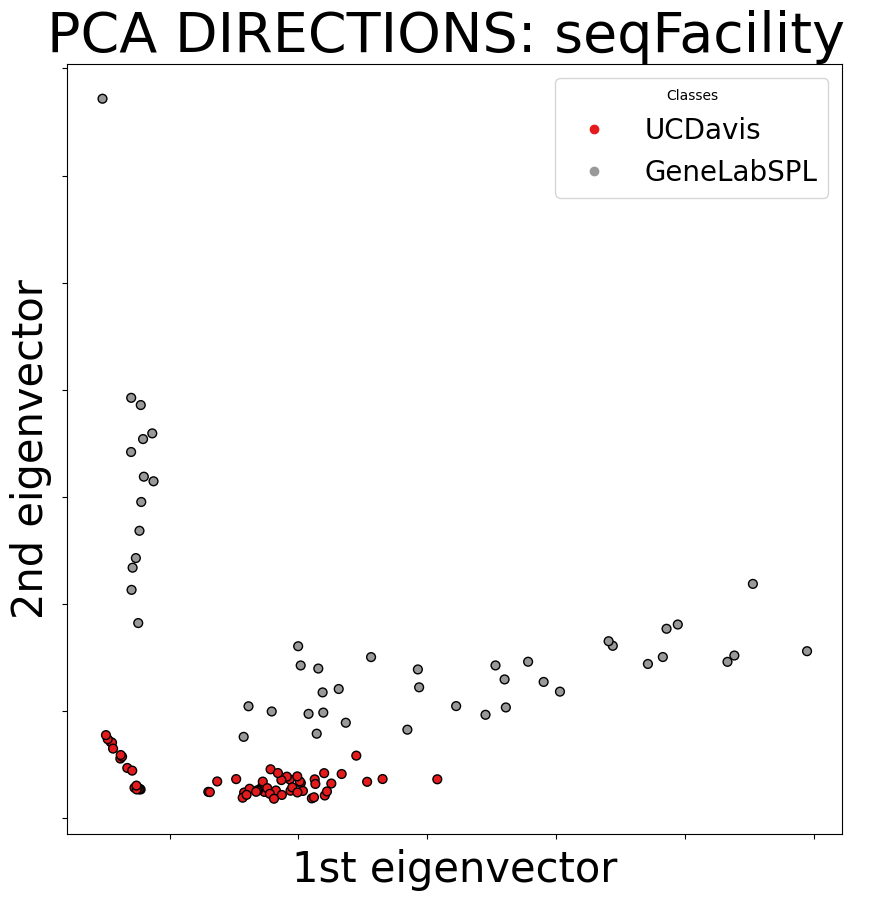

In [38]:
Z = PCA(n_components=2).fit_transform(X)

fig, ax = plt.subplots(figsize=(10,10))
scatter = ax.scatter(Z[:, 0], Z[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k", s=40)

ax.set_title("PCA DIRECTIONS: seqFacility ", size=40)
ax.set_xlabel("1st eigenvector", size=30)
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector", size=30)
ax.yaxis.set_ticklabels([])

plt.legend(handles=scatter.legend_elements()[0], title="Classes", labels= ['UCDavis', 'GeneLabSPL'], fontsize=20)
plt.show()

In [39]:
y = []
for sample in samples:
  if sample in strainDict:
    if strainDict[sample] == "BALBcT":
      y.append(0)
    elif strainDict[sample] == "C57BL6J":
      y.append(1)
    else:
      y.append(2)

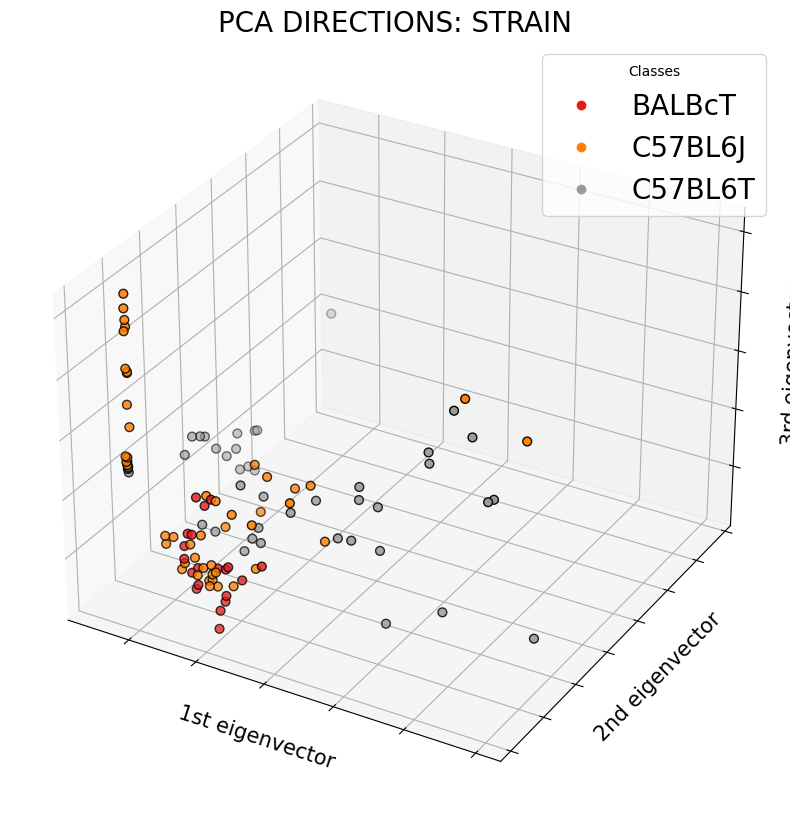

In [40]:
Z = PCA(n_components=3).fit_transform(X)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c=y, cmap=plt.cm.Set1, edgecolor="k", s=40)

ax.set_xlabel("1st eigenvector", size=15)
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector", size=15)
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector", size=15)
ax.zaxis.set_ticklabels([])
ax.set_title("PCA DIRECTIONS: STRAIN", size=20)

handles, labels = scatter.legend_elements()
legend = ax.legend(handles, ['BALBcT', 'C57BL6J', 'C57BL6T'], title="Classes", fontsize=10)
plt.legend(handles=scatter.legend_elements()[0], title="Classes", labels=['BALBcT', 'C57BL6J', 'C57BL6T'], fontsize=20)

plt.show()

Sources:

https://stackoverflow.com/questions/53137878/turning-a-text-file-into-a-tabular-format

https://www.statology.org/create-table-in-python/